In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Utils.styles import *

In [239]:

input_filenames = [
        # "Level_00/Volume_CSV/results.csv",
        "Level_01/Volume_CSV/results.csv",
        "Level_02/Volume_CSV/results.csv",
        ]

labels = [
        # r'$37\times37$',
        r'$65\times65$',
        r'$113\times113$'
]
lstyles = [
        '--',
        '-.',
        ':'
]


In [240]:
datas = {}

for ii,input_filename in enumerate(input_filenames):
    with open(input_filename, 'r') as f:
            ni = int(f.readline().strip().split('=')[1])
            nj = int(f.readline().strip().split('=')[1])
            nk = int(f.readline().strip().split('=')[1])
        
    df = pd.read_csv(input_filename, skiprows=3)
    data = {col: df[col].to_numpy().reshape((ni, nj, nk)) for col in df.columns}
    datas[ii] = data

In [241]:
blausius = np.loadtxt("Level_01/blausius_table.csv", delimiter=",", skiprows=1)
eta = blausius[:, 0]
dfdeta = blausius[:, 1]
eta_dfdeta_minusf = blausius[:, 2]

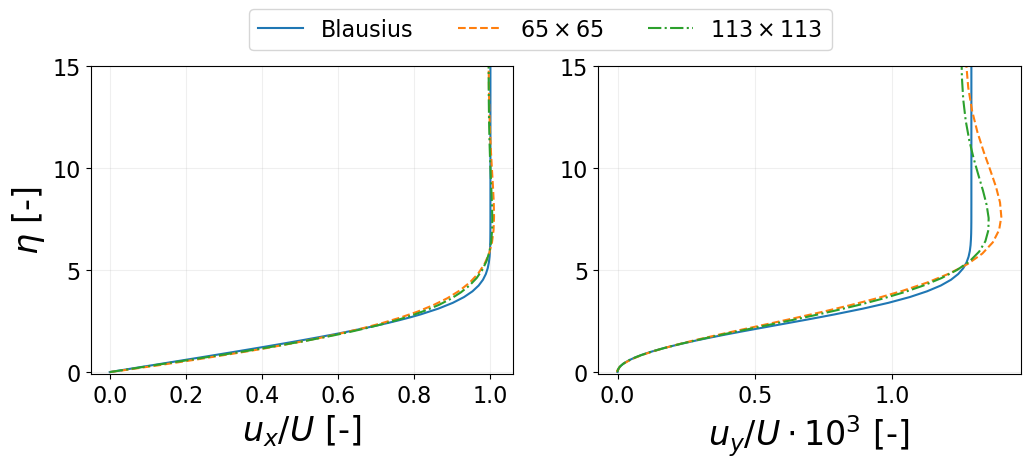

In [250]:
L = datas[0]['x'][-1, 0, 0] - datas[0]['x'][0, 0, 0]
xComparison = datas[0]['x'][0, 0, 0] +L / 2
nu = 1.48E-5

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for key, data in datas.items():
    iCheck = np.argmin(np.abs(data['x'][:, 0, 0] - xComparison))

    U = data['Velocity X'][iCheck, -1, 0]
    U = 68.3
    y = data['y'][iCheck, :, 0]
    x = data['x'][iCheck, :, 0]
    etaFlow = y / (nu * x / U)**0.5
    ublausius = U * dfdeta
    vblausius = 0.5 * (U * nu / x[iCheck]) ** 0.5 * eta_dfdeta_minusf
    
    if key==0:
        ax[0].plot(ublausius/U, eta, label='Blausius')
        ax[1].plot(vblausius/U*1000, eta)
    ax[0].plot(data['Velocity X'][iCheck, :, 0]/U, etaFlow, lstyles[key], mfc='none',label=labels[key])
    ax[1].plot(data['Velocity Y'][iCheck, :, 0]/U*1000, etaFlow, lstyles[key])


fig.legend(ncol=len(input_filenames)+1, bbox_to_anchor=(0.5, 1.05), loc='upper center')
ax[0].set_ylabel(r'$\eta$ [-]')
ax[0].set_xlabel(r'$u_x/U$ [-]')
ax[0].grid(alpha=0.2)

ax[1].set_xlabel(r'$u_y/U\cdot10^3$ [-]')
ax[1].grid(alpha=0.2)

ax[0].set_ylim(-0.1, 15)
ax[1].set_ylim(-0.1, 15)

fig.savefig('flatplate_results_comparison.pdf', bbox_inches='tight')


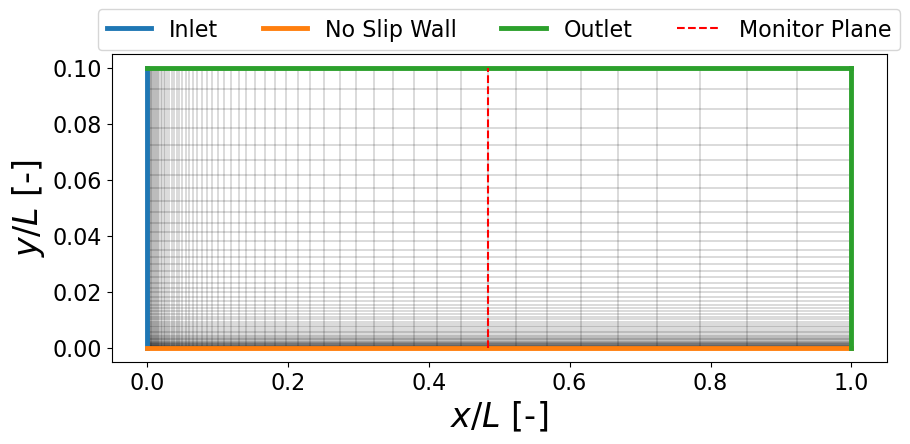

In [251]:
data = datas[0]
L = datas[0]['x'][-1, 0, 0] - datas[0]['x'][0, 0, 0]
xComparison = datas[0]['x'][0, 0, 0] +L / 2
iCheck = np.argmin(np.abs(datas[0]['x'][:, 0, 0] - xComparison))
# plot the grid 
plt.figure(figsize=(10,4))


ni,nj,nk = data['x'].shape
for i in range(1, ni-1):
    plt.plot(data['x'][i, :, 0]/L, data['y'][i, :, 0]/L, 'k', lw=0.2)
for j in range(1, nj-1):
    plt.plot(data['x'][:, j, 0]/L, data['y'][:, j, 0]/L, 'k', lw=0.2)

plt.plot(data['x'][0, :, 0]/L, data['y'][0, :, 0]/L, 'C0', label='Inlet', lw=3.5)
plt.plot(data['x'][:, 0, 0]/L, data['y'][:, 0, 0]/L, 'C1', label='No Slip Wall', lw=3.5)
plt.plot(data['x'][:, -1, 0]/L, data['y'][:, -1, 0]/L, 'C2', label='Outlet', lw=3.5)
plt.plot(data['x'][-1, :, 0]/L, data['y'][-1, :, 0]/L, 'C2', lw=3.5)
iCheck = np.argmin(np.abs(data['x'][:, 0, 0]-xComparison))
plt.plot(data['x'][iCheck, :, 0]/L, data['y'][-1, :, 0]/L, '--r', lw=1.5, label='Monitor Plane')


plt.xlabel(r'$x/L$ [-]')
plt.ylabel(r'$y/L$ [-]')


plt.legend(ncol=4, bbox_to_anchor=(0.5, 1.18), loc='upper center')
plt.savefig('flatplate_grid.pdf', bbox_inches='tight')